In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv("./steam-200k.csv")
title_list = data.drop_duplicates(['Title'])['Title']

display(data)

,UserId,Title,purchase,PlayTime,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0
...,...,...,...,...,...
199994,128470551,Titan Souls,play,1.5,0
199995,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199996,128470551,Grand Theft Auto Vice City,play,1.5,0
199997,128470551,RUSH,purchase,1.0,0


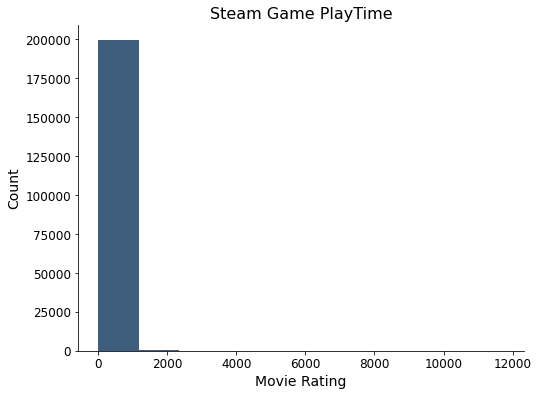

In [4]:
import matplotlib.pyplot as plt
# import chart_studio.plotly as py
# %matplotlib inline

plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.set_title("Steam Game PlayTime", fontsize=16)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
  
plt.xlabel("Movie Rating", fontsize=14)  
plt.ylabel("Count", fontsize=14)  
  
plt.hist(data['PlayTime'], color="#3F5D7D")  

plt.show()

In [3]:
print(data["PlayTime"].max())

11754.0


In [5]:
from sklearn.model_selection import train_test_split

df_train, df_test= train_test_split(data,
                                    #stratify=data['UserId'],
                                    random_state = 15688,
                                    test_size=0.30)


print("Number of training data: "+str(len(df_train)))
print("Number of test data: "+str(len(df_test)))

Number of training data: 139999
Number of test data: 60000


In [6]:
def condition(x) :
    if x <= 2 :
        return 0
    elif x <= 100 : 
        return 2
    elif x <= 500 :
        return 3
    elif x <= 1000 :
        return 4
def rating_splitter(df):
    #func = np.vectorize(condition)
    #experience = func(df["PlayTime"]) # df['rating']이 4이상이면 1 아니면 0
    #df['experience'] = experience
    df['experience'] = pd.cut(df['PlayTime'],
                             [0,2,100,500,1000,np.inf],
                             labels=[0,1,2,3,4])
    gp_user_like = df.groupby(['experience', 'UserId'])
    return ([gp_user_like.get_group(gp)['Title'].tolist() for gp in gp_user_like.groups]) 

In [7]:
pd.options.mode.chained_assignment = None
splitted_movies = rating_splitter(df_train)

In [1]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import gensim
assert gensim.models.word2vec.FAST_VERSION > -1

In [8]:
new_splitted_movies = splitted_movies[:1000]

In [9]:
import random

for movie_list in new_splitted_movies:
    random.shuffle(movie_list)

In [10]:
from gensim.models import Word2Vec
import datetime
start = datetime.datetime.now()

model = Word2Vec(sentences = new_splitted_movies, # We will supply the pre-processed list of moive lists to this parameter
                 epochs = 5, # epoch
                 min_count = 10, # a movie has to appear more than 10 times to be keeped
                 vector_size = 200, # size of the hidden layer
                 workers = 4, # specify the number of threads to be used for training
                 sg = 1, # Defines the training algorithm. We will use skip-gram so 1 is chosen.
                 hs = 0, # Set to 0, as we are applying negative sampling.
                 negative = 5, # If > 0, negative sampling will be used. We will use a value of 5.
                 window = 9999999)

print("Time passed: " + str(datetime.datetime.now()-start))
model.save('item2vec')
del model

Time passed: 0:00:03.094933


In [11]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

from gensim.models import Word2Vec
model = Word2Vec.load('item2vec')
word_vectors = model.wv
# del model # uncomment this line will delete the model

In [12]:
import requests
import re

def produce_list_of_game(list_of_gameName):
    list_of_game = []
    for gameName in list_of_gameName:
        if gameName in name_to_movieId.keys():
            list_of_game.append(str(name_to_movieId[movieName]))
    return list_of_game

def recommender(positive_list=None, negative_list=None, topn=20):
    recommend_game_ls = []
    if positive_list:
        positive_list = produce_list_of_game(positive_list)
    if negative_list:
        negative_list = produce_list_of_game(negative_list)
    for game, prob in model.wv.most_similar_cosmul(positive=positive_list, negative=negative_list, topn=topn):
        recommend_game_ls.append(game)
    return recommend_game_ls

In [13]:
ls = recommender(positive_list=["Fallout 4"], useRefineSearch=True, topn=5)
ls = list(map(int,ls))
print('Recommendation Result based on "Fallout 4":')
display(df_movies[df_movies["Title"].isin(ls)])

<td class="result_text"> <a href="/title/tt4741306/">Fallout 4</a> (2015) (Video Game) </td>
Fallout 4 (2015) (Video Game)
Refined Name: Fallout 4 (2015) (Video Game)


NameError: name 'name_to_movieId' is not defined